In [60]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [58]:
# Before make the push, corregir the path
bank = pd.read_csv("/home/fcoterroba/Escritorio/clonaciones_github/Apuntes_AndaluciaLAB/Inteligencia_Artificial/bank-full.csv", sep=";")

In [67]:
# Geneate an array
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

In [62]:
feature_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaing',
 'pdays',
 'previous',
 'poutcome']

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

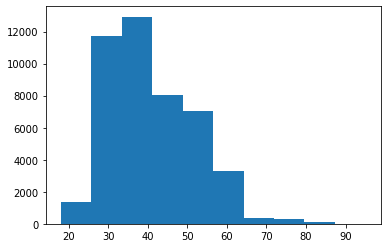

In [63]:
plt.hist(bank.age)

In [64]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [65]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [68]:
train_x, test_x, train_y, test_y = train_test_split(bank[feature_cols], bank.y, test_size = 0.25, random_state = 123)

In [69]:
train_x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
26999,32,unemployed,single,secondary,no,2706,no,no,cellular,21,nov,462,3,-1,0,unknown
16168,37,admin.,married,secondary,no,1396,yes,no,cellular,22,jul,199,2,-1,0,unknown
12338,22,blue-collar,married,secondary,no,-295,yes,no,unknown,26,jun,150,2,-1,0,unknown
6074,36,blue-collar,married,secondary,no,-870,yes,no,unknown,26,may,102,2,-1,0,unknown
7385,50,admin.,married,primary,no,429,no,no,unknown,29,may,60,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,50,unemployed,married,secondary,no,3674,yes,no,unknown,30,may,886,3,-1,0,unknown
15377,36,management,married,tertiary,no,635,yes,no,cellular,18,jul,359,1,-1,0,unknown
17730,43,blue-collar,married,primary,no,3664,no,no,telephone,29,jul,274,1,-1,0,unknown
28030,55,unemployed,married,primary,no,8585,no,no,telephone,28,jan,201,2,-1,0,unknown


In [70]:
train_x_dummies = pd.get_dummies(data=train_x, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [73]:
test_x_dummies = pd.get_dummies(data=test_x, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [75]:
dtc2 = tree.DecisionTreeClassifier(max_depth=2)
modelBank2 = dtc2.fit(train_x_dummies, train_y)
dtc2.score(train_x_dummies, train_y)


0.894390704258582

In [76]:
dtc2.score(test_x_dummies, test_y)

0.898876404494382

In [77]:
predict2 = dtc2.predict(test_x_dummies)
predict2

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)